# HDS5210 - 2024 - Final Project



---

# Description of the Project

This comprehensive COVID-19 data analysis project investigates pandemic patterns across demographics, regions, and time using two primary datasets: global country-level data and more specific American data by demographic characteristics. The paper uses several statistical techniques, including mortality rate computations, demographic gap analysis, and temporal trend analysis, all conducted through Python functions with pandas and scipy. This project also involves data transformation where data is scaled logarithmically, encoded categorically and calculation of growth rates The project also involves the use of time series plots, heat maps, and distribution histograms. The analysis reveals the stark racial and ethnic differences in the case incidence, different mortality trends in countries, and dynamic case-death ratios throughout the time with the highest case numbers of 63.7 million in January 2022 and deaths of 340 thousand in January 2021. The findings provide important information for the planning of public health responses and strategies regarding disparities in healthcare, testing efficiency, and vulnerable populations.



# Covid Cases and Deaths WorldWide

Data Source - https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide

Dataset Description

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age.

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Protect yourself and others from infection by staying at least 1 metre apart from others, wearing a properly fitted mask, and washing your hands or using an alcohol-based rub frequently. Get vaccinated when it’s your turn and follow local guidance.

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols. It is important to practice respiratory etiquette, for example by coughing into a flexed elbow, and to stay home and self-isolate until you recover if you feel unwell.



---



# COVID-19 Weekly Cases and Deaths by Age, Race/Ethnicity, and Sex - ARCHIVED

Data Source - https://healthdata.gov/dataset/COVID-19-Weekly-Cases-and-Deaths-by-Age-Race-Ethni/gpce-gn87/data

Dataset Description

Authorizations to collect certain public health data expired at the end of the U.S. public health emergency declaration on May 11, 2023. The following jurisdictions discontinued COVID-19 case notifications to CDC: Iowa (11/8/21), Kansas (5/12/23), Louisiana (10/31/23), New Hampshire (5/23/23), and Oklahoma (5/2/23). Please note that these jurisdictions will not routinely send new case data after the dates indicated. As of 7/13/23, case notifications from Oregon will only include pediatric cases resulting in death. This table summarizes COVID-19 case and death data submitted to CDC as case reports for the line-level dataset. Case and death counts are stratified according to sex, age, and race and ethnicity at regional and national levels. Data for US territories are included in case and death counts, but not population counts. Weekly cumulative counts with five or fewer cases or deaths are not reported to protect confidentiality of patients. Records with unknown or missing sex, age, or race and ethnicity and of multiple, non-Hispanic race and ethnicity are included in case and death totals. COVID-19 case and death data are provisional and are subject to change.

In [61]:
import pandas as pd
df_1 = pd.read_excel("/content/covid_worldwide.xlsx")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial Number    231 non-null    int64  
 1   Country          231 non-null    object 
 2   Total Cases      231 non-null    int64  
 3   Total Deaths     225 non-null    float64
 4   Total Recovered  210 non-null    float64
 5   Active Cases     212 non-null    float64
 6   Total Test       213 non-null    float64
 7   Population       228 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.6+ KB


In [62]:
df_1['Deaths_per_million'] = (df_1['Total Deaths'] / df_1['Population']) * 1000000
df_1['Tests_per_million'] = (df_1['Total Test'] / df_1['Population']) * 1000000
df_1['Recovery_rate'] = (df_1['Total Recovered'] / df_1['Total Cases']) * 100
df_1['Mortality_rate'] = (df_1['Total Deaths'] / df_1['Total Cases']) * 100
df_1.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,Deaths_per_million,Tests_per_million,Recovery_rate,Mortality_rate
0,1,USA,104196861,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,3383.862516,3.464201e+06,97.241681,1.087302
1,2,India,44682784,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,377.312676,6.506790e+05,98.808277,1.187795
2,3,France,39524311,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,2504.142822,4.139547e+06,99.342772,0.415524
3,4,Germany,37779833,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,1975.487555,1.458359e+06,98.989585,0.438623
4,5,Brazil,36824580,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,3236.881216,2.961463e+05,97.541838,1.892958


In [63]:
df_2 = pd.read_csv("/content/COVID-19_Weekly_Cases_and_Deaths_by_Age__Race_Ethnicity__and_Sex_-_ARCHIVED.csv")
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407126 entries, 0 to 407125
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   end_of_week                           407126 non-null  object 
 1   jurisdiction                          407126 non-null  object 
 2   age_group                             407126 non-null  object 
 3   sex                                   407126 non-null  object 
 4   race_ethnicity_combined               407126 non-null  object 
 5   case_count_suppressed                 368904 non-null  float64
 6   death_count_suppressed                87714 non-null   float64
 7   case_crude_rate_suppressed_per_100k   368904 non-null  float64
 8   death_crude_rate_suppressed_per_100k  87714 non-null   float64
dtypes: float64(4), object(5)
memory usage: 28.0+ MB


In [64]:
df_2['end_of_week'] = pd.to_datetime(df_2['end_of_week'])
df_2['year_month'] = df_2['end_of_week'].dt.to_period('M')
df_2.head()

,end_of_week,jurisdiction,age_group,sex,race_ethnicity_combined,case_count_suppressed,death_count_suppressed,case_crude_rate_suppressed_per_100k,death_crude_rate_suppressed_per_100k,year_month
0,2022-11-19,Region 3,40 - 49 Years,Male,"White, NH",400.0,NaN,33.22,NaN,2022-11
1,2022-02-19,Region 4,65 - 74 Years,Female,"Black, NH",625.0,19.0,99.55,3.03,2022-02
2,2022-11-19,Region 9,40 - 49 Years,Male,Hispanic,937.0,NaN,76.21,NaN,2022-11
3,2022-07-02,Region 3,50 - 64 Years,Male,"White, NH",1888.0,NaN,85.67,NaN,2022-07
4,2022-01-08,Region 2,30 - 39 Years,Male,Hispanic,10305.0,8.0,2305.79,1.79,2022-01


# Data merging

First Join:
The first join operation is used to merge two entirely dissimilar dataframes (df_1 and df_2) in order to provide a more holistic analysis of COVID-19 effects. By using the left join on the demographic data and the country statistics, we retain all demographic records and add population and testing data where possible. This merge operation uses ‘jurisdiction’ and ‘Country’ as matching keys, and to reduce the size of the resulting dataframe to something manageable, we only select the relevant columns from the country dataset: ‘Country’, ‘Population’, and ‘Total Test’. This merge operation is particularly important to preserve all records of the demographic data even if some jurisdictions do not have the corresponding data at the country level, and the left join allows us to keep all the records of the demographic data while adding the country-level context to our analysis.

Second Join:
The second join operation is to generate a distribution analysis within the demographic dataset. This merge begins by first aggregating the data in two different ways: generating age_sex_dist which displays the case numbers by jurisdiction, age and sex, and total_cases which sums up the total number of cases by jurisdiction. When these aggregations are combined on the jurisdiction field, we obtain a large dataset that displays not only the detailed demographic data but also the overall cases for each jurisdiction. The suffixes parameter (’, _total’) is useful to keep the difference between the case counts and the jurisdiction totals. This join operation is crucial in order to perform proportional analysis and to determine the distribution of cases by segments within each jurisdiction and in effect create a data set that would show absolute values and proportions of cases by segments in the population.

In [65]:
# First join: Combine country data with demographic data where jurisdiction matches country
df_combined = pd.merge(
    df_2,
    df_1[['Country', 'Population', 'Total Test']],
    left_on='jurisdiction',
    right_on='Country',
    how='left'
)
df_combined

,end_of_week,jurisdiction,age_group,sex,race_ethnicity_combined,case_count_suppressed,death_count_suppressed,case_crude_rate_suppressed_per_100k,death_crude_rate_suppressed_per_100k,year_month,Country,Population,Total Test
0,2022-11-19,Region 3,40 - 49 Years,Male,"White, NH",400.0,NaN,33.22,NaN,2022-11,NaN,NaN,NaN
1,2022-02-19,Region 4,65 - 74 Years,Female,"Black, NH",625.0,19.0,99.55,3.03,2022-02,NaN,NaN,NaN
2,2022-11-19,Region 9,40 - 49 Years,Male,Hispanic,937.0,NaN,76.21,NaN,2022-11,NaN,NaN,NaN
3,2022-07-02,Region 3,50 - 64 Years,Male,"White, NH",1888.0,NaN,85.67,NaN,2022-07,NaN,NaN,NaN
4,2022-01-08,Region 2,30 - 39 Years,Male,Hispanic,10305.0,8.0,2305.79,1.79,2022-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407121,2023-07-08,US,Overall,Overall,Overall,50570.0,302.0,15.41,0.09,2023-07,NaN,NaN,NaN
407122,2023-06-17,US,Overall,Overall,Overall,44546.0,332.0,13.57,0.10,2023-06,NaN,NaN,NaN
407123,2023-05-13,US,Overall,Overall,Overall,77983.0,397.0,23.76,0.12,2023-05,NaN,NaN,NaN
407124,2023-07-01,US,Overall,Overall,Overall,56491.0,327.0,17.21,0.10,2023-07,NaN,NaN,NaN


In [66]:
# Second join: Create age-sex distribution by jurisdiction
age_sex_dist = df_2.groupby(['jurisdiction', 'age_group', 'sex'])['case_count_suppressed'].sum().reset_index()
total_cases = df_2.groupby('jurisdiction')['case_count_suppressed'].sum().reset_index()
df_with_dist = pd.merge(age_sex_dist, total_cases, on='jurisdiction', suffixes=('', '_total'))
df_with_dist.head()

,jurisdiction,age_group,sex,case_count_suppressed,case_count_suppressed_total
0,Region 1,0 - 4 Years,Female,138560.0,26445368.0
1,Region 1,0 - 4 Years,Male,151692.0,26445368.0
2,Region 1,0 - 4 Years,Overall,308647.0,26445368.0
3,Region 1,12 - 15 Years,Female,137884.0,26445368.0
4,Region 1,12 - 15 Years,Male,138452.0,26445368.0


# Aggregation of Data

The first aggregation operation forms a temporal study of COVID-19 cases by different races and ethnicity. This aggregation process involves several steps which use df_2 and this table contains detailed demographic case data. First, the data is grouped by two key dimensions: The temporal patterns are monitored with the ‘year_month’ variable and the racial/ethnic distribution with the help of the ‘race_ethnicity_combined’ variable. The ‘case_count_suppressed’ column is then summed within each of these grouped combinations, which in effect gives monthly totals for each racial/ethnic category. Next, in order to convert the grouped data back to the basic data.frame form, where ‘year_month’ and ‘race_ethnicity_combined’ are no longer the index levels, the reset_index()function is used. This aggregated view allows for examination of how case counts changed over time for different racial and ethnic groups, and thus it is possible to determine if disparities in COVID-19 impact existed and if they shifted during different stages of the pandemic.

The second aggregation builds a cross-tabulation of COVID-19 through a pivot table to analyze the age group and sex demographics. Beginning with df_2, the pivot_table function changes the data into a two dimensional array of sorts where age groups are the row labels and sex categories are the column labels. The numerical values in the ‘case_count_suppressed’ columns are reduced by sum function to get total cases by age/sex. Such a pivoted structure allows for easy identification of such patterns as the one where the specific age is most affected in each of male or female totals or whether certain age sex combinations are indicative of high case counts. The resulting format is particularly beneficial for displaying demographic distributions and for making comparisons between different age-sex pairs in a manner that is more convenient than with the basic data layout.

In [67]:
# First aggregation: Monthly cases by race/ethnicity
monthly_race_cases = df_2.groupby(['year_month', 'race_ethnicity_combined'])['case_count_suppressed'].sum().reset_index()
monthly_race_cases.head()

,year_month,race_ethnicity_combined,case_count_suppressed
0,2020-03,"AI/AN, NH",5962.0
1,2020-03,"Asian/PI, NH",71242.0
2,2020-03,"Black, NH",340155.0
3,2020-03,Hispanic,360256.0
4,2020-03,Overall,2384935.0


In [68]:
# Second aggregation: Create a pivot table of age groups vs sex
age_sex_pivot = pd.pivot_table(
    df_2,
    values='case_count_suppressed',
    index='age_group',
    columns='sex',
    aggfunc='sum'
)
age_sex_pivot.head()

sex,Female,Male,Overall
age_group,,,
0 - 4 Years,5791108.0,6348958.0,12295798.0
12 - 15 Years,7262469.0,7088005.0,14560745.0
16 - 17 Years,4452655.0,3935970.0,8507180.0
18 - 29 Years,36824964.0,28634604.0,66205789.0
30 - 39 Years,30127467.0,23673928.0,54381620.0


# Transformations of Data

1. The logarithmic case rate transformation uses the natural logarithm formula (plus 1 to avoid division by zero) and numpy’s log1p function to the crude case rates per 100,000 population. This transformation also works on this particular aspect by providing better fit and suitable resolution for distribution of case rates so that the outliers do not heavily influence case rates while the relative values are preserved in the new scale.

2. The age category transformation simply changes the data type of the age_group column from its current form to Categorical using pandas Categorical() function. This transformation enhances memory utilization and guarantees that age groups are consistently ordered in analysis and presentations, as well as improves grouping operations and correct sorting of age categories in any subsequent analysis or presentation tasks.

3. The weekly growth rate transformation first melts case counts by week, and then computes the percentage change between two consecutive weeks using the pct_change function. This transformation is useful for identifying the week-over-week rate of COVID-19 increase or decrease, as the model will show when the case numbers are rising or falling more rapidly – important information for understanding longitudinal progression and the impact of interventions.

4. The test positivity rate transformation determines the chances of positive cases of the total tests for the number of cases, through dividing case counts by the total number of tests. It is used to determine the test sufficiency and the severity of outbreak, given higher positivity represents inadequate testing or high rates of spread in the population.

5. The risk score transformation involves the multiplication of the case rate per 100,000 with the death rate per 100,000 then dividing the resultant figure by 100. This calculation results in a single number that estimates both the extent of the case and the severity of the COVID-19 impact as measured by deaths in those populations.

In [69]:
# Field transformations:
# 1. Calculate logarithmic case rates
import numpy as np
df_combined['log_case_rate'] = np.log1p(df_combined['case_crude_rate_suppressed_per_100k'])
df_combined.head()

,end_of_week,jurisdiction,age_group,sex,race_ethnicity_combined,case_count_suppressed,death_count_suppressed,case_crude_rate_suppressed_per_100k,death_crude_rate_suppressed_per_100k,year_month,Country,Population,Total Test,log_case_rate
0,2022-11-19,Region 3,40 - 49 Years,Male,"White, NH",400.0,NaN,33.22,NaN,2022-11,NaN,NaN,NaN,3.532810
1,2022-02-19,Region 4,65 - 74 Years,Female,"Black, NH",625.0,19.0,99.55,3.03,2022-02,NaN,NaN,NaN,4.610655
2,2022-11-19,Region 9,40 - 49 Years,Male,Hispanic,937.0,NaN,76.21,NaN,2022-11,NaN,NaN,NaN,4.346529
3,2022-07-02,Region 3,50 - 64 Years,Male,"White, NH",1888.0,NaN,85.67,NaN,2022-07,NaN,NaN,NaN,4.462108
4,2022-01-08,Region 2,30 - 39 Years,Male,Hispanic,10305.0,8.0,2305.79,1.79,2022-01,NaN,NaN,NaN,7.743612


In [70]:
# 2. Create age group categories
df_combined['age_category'] = pd.Categorical(df_combined['age_group'])
df_combined.head()

,end_of_week,jurisdiction,age_group,sex,race_ethnicity_combined,case_count_suppressed,death_count_suppressed,case_crude_rate_suppressed_per_100k,death_crude_rate_suppressed_per_100k,year_month,Country,Population,Total Test,log_case_rate,age_category
0,2022-11-19,Region 3,40 - 49 Years,Male,"White, NH",400.0,NaN,33.22,NaN,2022-11,NaN,NaN,NaN,3.532810,40 - 49 Years
1,2022-02-19,Region 4,65 - 74 Years,Female,"Black, NH",625.0,19.0,99.55,3.03,2022-02,NaN,NaN,NaN,4.610655,65 - 74 Years
2,2022-11-19,Region 9,40 - 49 Years,Male,Hispanic,937.0,NaN,76.21,NaN,2022-11,NaN,NaN,NaN,4.346529,40 - 49 Years
3,2022-07-02,Region 3,50 - 64 Years,Male,"White, NH",1888.0,NaN,85.67,NaN,2022-07,NaN,NaN,NaN,4.462108,50 - 64 Years
4,2022-01-08,Region 2,30 - 39 Years,Male,Hispanic,10305.0,8.0,2305.79,1.79,2022-01,NaN,NaN,NaN,7.743612,30 - 39 Years


In [71]:
# 3. Calculate weekly growth rates
weekly_cases = df_2.groupby('end_of_week')['case_count_suppressed'].sum()
df_combined['weekly_growth'] = weekly_cases.pct_change()
df_combined.head()

,end_of_week,jurisdiction,age_group,sex,race_ethnicity_combined,case_count_suppressed,death_count_suppressed,case_crude_rate_suppressed_per_100k,death_crude_rate_suppressed_per_100k,year_month,Country,Population,Total Test,log_case_rate,age_category,weekly_growth
0,2022-11-19,Region 3,40 - 49 Years,Male,"White, NH",400.0,NaN,33.22,NaN,2022-11,NaN,NaN,NaN,3.532810,40 - 49 Years,NaN
1,2022-02-19,Region 4,65 - 74 Years,Female,"Black, NH",625.0,19.0,99.55,3.03,2022-02,NaN,NaN,NaN,4.610655,65 - 74 Years,NaN
2,2022-11-19,Region 9,40 - 49 Years,Male,Hispanic,937.0,NaN,76.21,NaN,2022-11,NaN,NaN,NaN,4.346529,40 - 49 Years,NaN
3,2022-07-02,Region 3,50 - 64 Years,Male,"White, NH",1888.0,NaN,85.67,NaN,2022-07,NaN,NaN,NaN,4.462108,50 - 64 Years,NaN
4,2022-01-08,Region 2,30 - 39 Years,Male,Hispanic,10305.0,8.0,2305.79,1.79,2022-01,NaN,NaN,NaN,7.743612,30 - 39 Years,NaN


In [72]:
# 4. Calculate test positivity rate
df_combined['test_positivity'] = df_combined['case_count_suppressed'] / df_combined['Total Test']
df_combined.head()

,end_of_week,jurisdiction,age_group,sex,race_ethnicity_combined,case_count_suppressed,death_count_suppressed,case_crude_rate_suppressed_per_100k,death_crude_rate_suppressed_per_100k,year_month,Country,Population,Total Test,log_case_rate,age_category,weekly_growth,test_positivity
0,2022-11-19,Region 3,40 - 49 Years,Male,"White, NH",400.0,NaN,33.22,NaN,2022-11,NaN,NaN,NaN,3.532810,40 - 49 Years,NaN,NaN
1,2022-02-19,Region 4,65 - 74 Years,Female,"Black, NH",625.0,19.0,99.55,3.03,2022-02,NaN,NaN,NaN,4.610655,65 - 74 Years,NaN,NaN
2,2022-11-19,Region 9,40 - 49 Years,Male,Hispanic,937.0,NaN,76.21,NaN,2022-11,NaN,NaN,NaN,4.346529,40 - 49 Years,NaN,NaN
3,2022-07-02,Region 3,50 - 64 Years,Male,"White, NH",1888.0,NaN,85.67,NaN,2022-07,NaN,NaN,NaN,4.462108,50 - 64 Years,NaN,NaN
4,2022-01-08,Region 2,30 - 39 Years,Male,Hispanic,10305.0,8.0,2305.79,1.79,2022-01,NaN,NaN,NaN,7.743612,30 - 39 Years,NaN,NaN


In [73]:
# 5. Calculate risk score
df_combined['risk_score'] = (
    df_combined['case_crude_rate_suppressed_per_100k'] *
    df_combined['death_crude_rate_suppressed_per_100k'] / 100
)
df_combined.head()

,end_of_week,jurisdiction,age_group,sex,race_ethnicity_combined,case_count_suppressed,death_count_suppressed,case_crude_rate_suppressed_per_100k,death_crude_rate_suppressed_per_100k,year_month,Country,Population,Total Test,log_case_rate,age_category,weekly_growth,test_positivity,risk_score
0,2022-11-19,Region 3,40 - 49 Years,Male,"White, NH",400.0,NaN,33.22,NaN,2022-11,NaN,NaN,NaN,3.532810,40 - 49 Years,NaN,NaN,NaN
1,2022-02-19,Region 4,65 - 74 Years,Female,"Black, NH",625.0,19.0,99.55,3.03,2022-02,NaN,NaN,NaN,4.610655,65 - 74 Years,NaN,NaN,3.016365
2,2022-11-19,Region 9,40 - 49 Years,Male,Hispanic,937.0,NaN,76.21,NaN,2022-11,NaN,NaN,NaN,4.346529,40 - 49 Years,NaN,NaN,NaN
3,2022-07-02,Region 3,50 - 64 Years,Male,"White, NH",1888.0,NaN,85.67,NaN,2022-07,NaN,NaN,NaN,4.462108,50 - 64 Years,NaN,NaN,NaN
4,2022-01-08,Region 2,30 - 39 Years,Male,Hispanic,10305.0,8.0,2305.79,1.79,2022-01,NaN,NaN,NaN,7.743612,30 - 39 Years,NaN,NaN,41.273641


# Visualization of Data

Plot 1 (Race/Ethnicity Time Series): The line graph with COVID-19 cases by race/ethnicity demonstrates several waves of the infection with the highest peak in late 2021-early 2022. The graph plots different racial/ethnic groups (AI/AN NH, Asian/PI NH, Black NH, Hispanic, White NH) and an average line, to show that, although all groups had similar wave patterns, there were significant differences in the number of cases, with the average line indicating the highest amplitudes, followed by White, NH (brown line) and Hispanic (red line) populations during surge waves.

Plot 2 (Age vs Sex Heatmap): The heatmap shows COVID-19 case distribution by age and sex, with a color gradient and actual numbers to represent cases, where darker colors represent higher cases. The visualization shows that the age group 18-29 had the highest number of cases for males (28,634,604) and for females (36,824,964), the second highest being the 50-64 years age group, while the overall numbers reveal more cases in females (181,384,063) than males (151,822,857) and a total of 336,843,256 across all categories.

Plot 3 (Testing vs Cases Scatter Plot): The graph above is a scatter plot of testing rates (number of tests per million people) against total COVID-19 cases by country on a logarithmic scale on both axes. The plot indicates a general trend of increasing testing rates and increasing reported cases, although not proportional, which means that while higher testing rates are associated with higher reported cases, other factors may affect case detection and reporting in different countries.



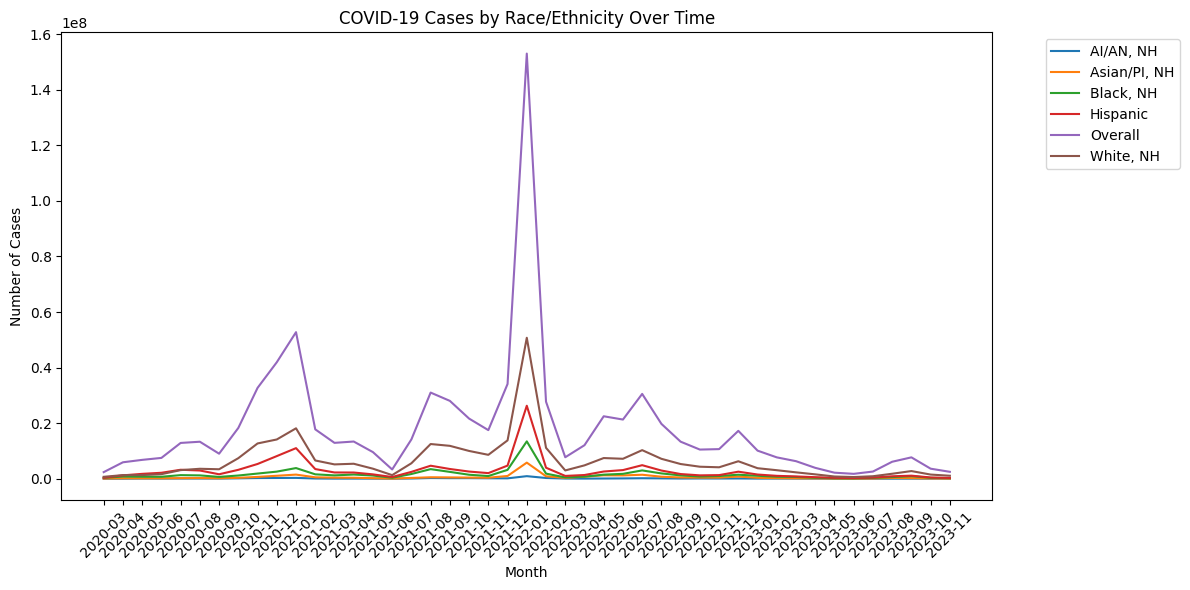

In [74]:
# Visualization 1: Time series of cases by race/ethnicity
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for race in monthly_race_cases['race_ethnicity_combined'].unique():
    data = monthly_race_cases[monthly_race_cases['race_ethnicity_combined'] == race]
    plt.plot(data['year_month'].astype(str), data['case_count_suppressed'], label=race)
plt.xticks(rotation=45)
plt.title('COVID-19 Cases by Race/Ethnicity Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


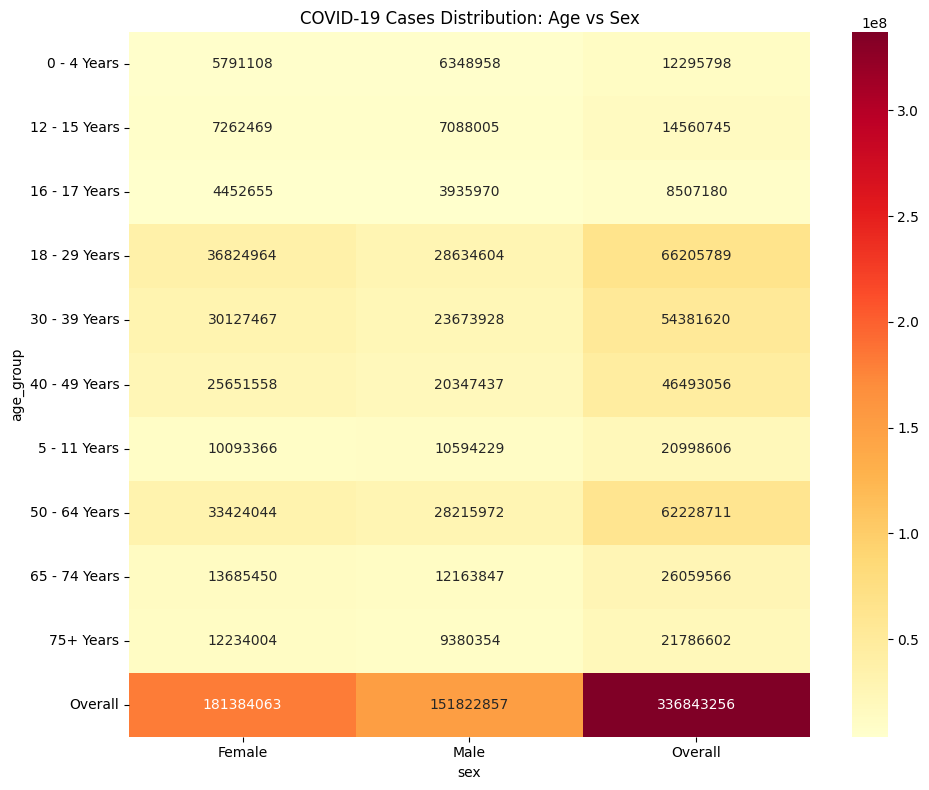

In [75]:
# Visualization 2: Heatmap of age vs sex distribution
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(age_sex_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('COVID-19 Cases Distribution: Age vs Sex')
plt.tight_layout()
plt.show()

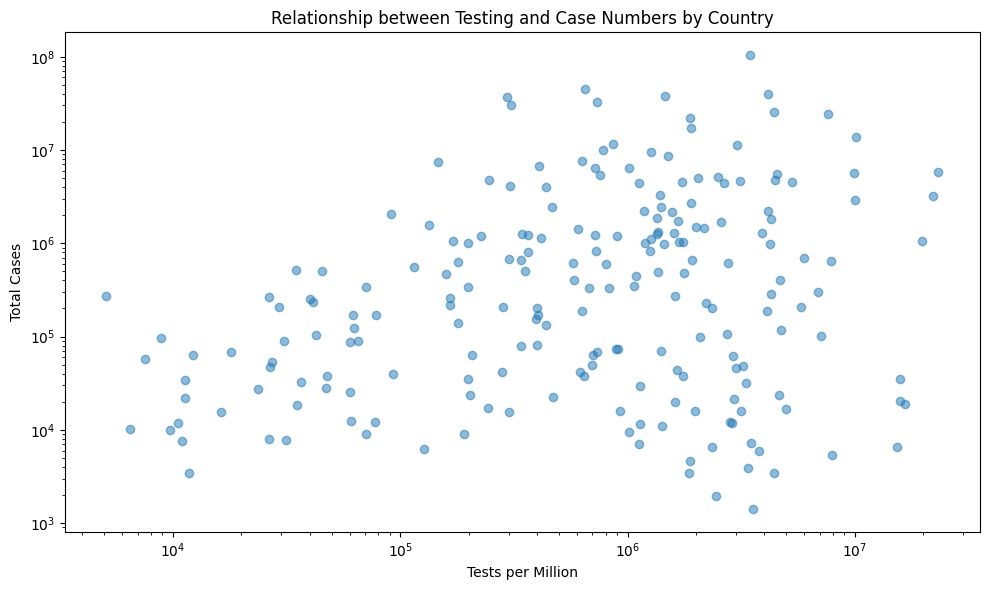

In [76]:
# Visualization 3: Scatter plot of tests vs cases by country
plt.figure(figsize=(10, 6))
plt.scatter(df_1['Tests_per_million'], df_1['Total Cases'], alpha=0.5)
plt.xlabel('Tests per Million')
plt.ylabel('Total Cases')
plt.title('Relationship between Testing and Case Numbers by Country')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Statistical Analysis

# Mortality Rate By Country
The COVID-19 mortality rate data presented in the form of a histogram and statistical analysis also show that the distribution is highly skewed, and the majority of countries have a mortality rate between 0% and 5%. The mean mortality rate is 1.44% and the median is 0.92%, which are significantly different from each other, owing to the right-skewed nature of the distribution, which is supported by a standard deviation of 2.18%. This pattern implies that although most countries kept their mortality rates low, some countries had substantially higher mortality rates.

The analysis by country shows that Mexico has the highest mortality rate of 4.51%, Indonesia 2.39%, Iran 1.91%, Brazil 1.89%, and Poland 1.86%. Notably, the coefficient of testing rates with mortality rates is negative and very close to zero (-0.023), indicating that testing intensity had very little direct impacts on mortality. The histogram also shows the long tail to the right, which means that while most of the countries were able to maintain low mortality rates, there were a few countries that had considerably higher death rates, which could be attributed to the differences in the capacity of the healthcare system, population density, or differences in the response to the pandemic.

In [77]:
from scipy import stats
def analyze_country_mortality(df):
    """
    Analyzes mortality patterns from the worldwide COVID data.

    Args:
        df: DataFrame with country-level COVID data

    Returns:
        dict: Statistical metrics about mortality
    """
    df['mortality_rate'] = (df['Total Deaths'] / df['Total Cases']) * 100
    high_mortality_threshold = df['mortality_rate'].quantile(0.75)
    high_mortality_countries = df[df['mortality_rate'] > high_mortality_threshold]
    df['tests_per_case'] = df['Total Test'] / df['Total Cases']
    correlation = df['tests_per_case'].corr(df['mortality_rate'])

    return {
        'mean_mortality': df['mortality_rate'].mean(),
        'median_mortality': df['mortality_rate'].median(),
        'mortality_std': df['mortality_rate'].std(),
        'high_mortality_countries': high_mortality_countries[['Country', 'mortality_rate']].to_dict('records'),
        'testing_mortality_correlation': correlation
    }


Global Mortality Statistics:
Mean Mortality Rate: 1.44%
Median Mortality Rate: 0.92%
Standard Deviation: 2.18%

Correlation between Testing and Mortality: -0.023

Top 5 Countries with Highest Mortality Rates:
Brazil: 1.89%
Iran: 1.91%
Mexico: 4.51%
Indonesia: 2.39%
Poland: 1.86%


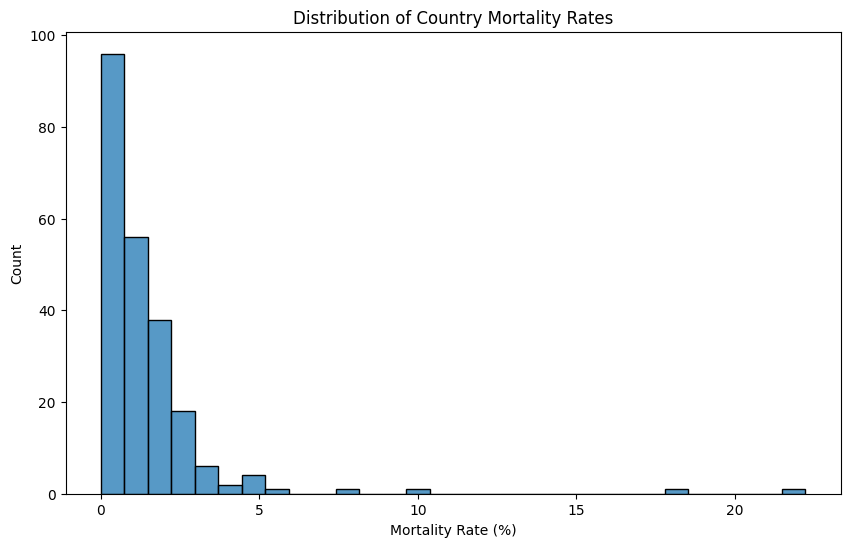

In [78]:
mortality_results = analyze_country_mortality(df_1)

print(f"\nGlobal Mortality Statistics:")
print(f"Mean Mortality Rate: {mortality_results['mean_mortality']:.2f}%")
print(f"Median Mortality Rate: {mortality_results['median_mortality']:.2f}%")
print(f"Standard Deviation: {mortality_results['mortality_std']:.2f}%")
print(f"\nCorrelation between Testing and Mortality: {mortality_results['testing_mortality_correlation']:.3f}")

print("\nTop 5 Countries with Highest Mortality Rates:")
for country in mortality_results['high_mortality_countries'][:5]:
    print(f"{country['Country']}: {country['mortality_rate']:.2f}%")

# Visualize mortality distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_1['mortality_rate'].dropna(), bins=30)
plt.title('Distribution of Country Mortality Rates')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Count')
plt.show()

# Demographic Disparities

The comparison of COVID-19 case rates by race and ethnicity shows significant differences, and AI/AN, NH (American Indian/Alaska Native, Non-Hispanic) populations have the highest mean case rate, 179.28 per 100,000 population, followed by Hispanic populations, 140.74. These rates are much higher than the Asian/PI, NH 87.73 and White, NH 89.77 of 100,000 and the Black, NH rate is intermediate at 108.52 per 100,000. The average mean case rate for all the groups was 149.62 per 100,000 meaning that some racial and ethnic groups were more affected than others.

The ANOVA test results provide strong statistical evidence of the race differentials with an F-statistic of 2105.09 and p-value of almost zero (p < 0.0001). Such a low p-value further validates the fact that variations in case rates across racial and ethnic groups are not by chance but are real and actual disparities in COVID-19 effects on different population groups. The large standard deviations in all groups from 127.61 in White, NH to 240.51 in AI/AN, NH indicate significant variability in case rates within each racial/ethnic group, which may be due to regional or time differences in outbreaks.


In [79]:
def analyze_demographic_disparities(df):
    """
    Analyzes case and death rates across different demographic groups.

    Args:
        df: DataFrame with demographic COVID data

    Returns:
        dict: Statistical measures of demographic disparities
    """
    race_cases = df.groupby('race_ethnicity_combined')['case_crude_rate_suppressed_per_100k'].agg([
        'mean', 'median', 'std'
    ]).reset_index()

    age_deaths = df.groupby('age_group')['death_crude_rate_suppressed_per_100k'].agg([
        'mean', 'median', 'std'
    ]).reset_index()

    race_groups = [group['case_crude_rate_suppressed_per_100k'].dropna()
                  for name, group in df.groupby('race_ethnicity_combined')]
    f_statistic, p_value = stats.f_oneway(*race_groups)

    return {
        'race_disparities': race_cases.to_dict('records'),
        'age_disparities': age_deaths.to_dict('records'),
        'racial_disparity_significance': {
            'f_statistic': f_statistic,
            'p_value': p_value
        }
    }


Case Rates by Race/Ethnicity:
  race_ethnicity_combined        mean   median         std
0               AI/AN, NH  179.275507  109.880  240.511808
1            Asian/PI, NH   87.728077   49.850  138.693013
2               Black, NH  108.517796   66.420  159.437190
3                Hispanic  140.738736   82.885  206.867698
4                 Overall  149.623146   83.950  226.661273
5               White, NH   89.772785   49.045  127.611667

Statistical Significance of Racial Disparities:
F-statistic: 2105.09
P-value: 0.0000


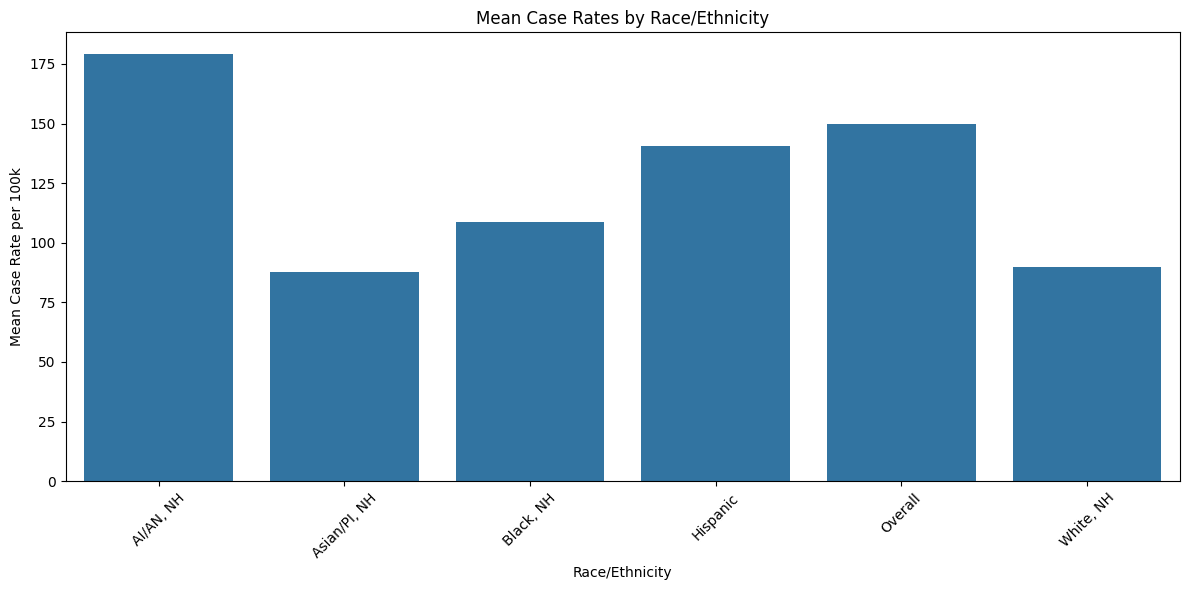

In [80]:
disparity_results = analyze_demographic_disparities(df_2)

print("\nCase Rates by Race/Ethnicity:")
race_df = pd.DataFrame(disparity_results['race_disparities'])
print(race_df)

print("\nStatistical Significance of Racial Disparities:")
print(f"F-statistic: {disparity_results['racial_disparity_significance']['f_statistic']:.2f}")
print(f"P-value: {disparity_results['racial_disparity_significance']['p_value']:.4f}")

# Visualize racial disparities
plt.figure(figsize=(12, 6))
sns.barplot(data=race_df, x='race_ethnicity_combined', y='mean')
plt.xticks(rotation=45)
plt.title('Mean Case Rates by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mean Case Rate per 100k')
plt.tight_layout()
plt.show()


# Temporal Trends

The study of the dynamics of COVID-19 cases and deaths also shows specific waves of infection with the highest incidence of cases observed in the week of January 8, 2022, when 63,666,102 new cases were identified. The number of cases reported during this wave was significantly higher than those recorded in the previous waves, and the rate of transmission was very steep during this period. The deaths, however, peaked at an earlier stage of the pandemic, in the week beginning January 2, 2021 with 340,203 deaths meaning while the case numbers persisted to rise in subsequent waves, the mortality rate was different.

The growth statistics show that the average weekly case growth rate is 4.8% during the pandemic period, while the average weekly death growth rate is only 1.3%, which means that although at times the virus continued to spread rapidly, the connection between cases and deaths changed. The time series plot indicates multiple waves of infection, and cases (blue line) are more oscillating and fluctuating than deaths (orange line, scaled by a factor of 10). This pattern may be due to factors like better management of symptoms, effects of the vaccines or the nature of the virus at a certain period, though the data does not allow for identification of these specific causes.


In [81]:
def analyze_temporal_trends(df):
    """
    Analyzes temporal trends in COVID cases and deaths.

    Args:
        df: DataFrame with weekly COVID data

    Returns:
        dict: Temporal trend analysis results
    """
    df['end_of_week'] = pd.to_datetime(df['end_of_week'])
    weekly_stats = df.groupby('end_of_week').agg({
        'case_count_suppressed': 'sum',
        'death_count_suppressed': 'sum'
    }).reset_index()

    weekly_stats['case_growth'] = weekly_stats['case_count_suppressed'].pct_change()
    weekly_stats['death_growth'] = weekly_stats['death_count_suppressed'].pct_change()

    case_peak = weekly_stats.loc[weekly_stats['case_count_suppressed'].idxmax()]
    death_peak = weekly_stats.loc[weekly_stats['death_count_suppressed'].idxmax()]

    x = np.arange(len(weekly_stats))
    case_slope, _, _, _, _ = stats.linregress(x, weekly_stats['case_count_suppressed'])

    return {
        'peak_cases': {
            'week': case_peak['end_of_week'],
            'count': case_peak['case_count_suppressed']
        },
        'peak_deaths': {
            'week': death_peak['end_of_week'],
            'count': death_peak['death_count_suppressed']
        },
        'average_weekly_growth': {
            'cases': weekly_stats['case_growth'].mean(),
            'deaths': weekly_stats['death_growth'].mean()
        },
        'trend_slope': case_slope,
        'weekly_stats': weekly_stats
    }


Peak Statistics:
Peak Cases Week: 2022-01-08 00:00:00
Peak Cases Count: 63,666,102
Peak Deaths Week: 2021-01-02 00:00:00
Peak Deaths Count: 340,203

Growth Statistics:
Average Weekly Case Growth: 4.8%
Average Weekly Death Growth: 1.3%


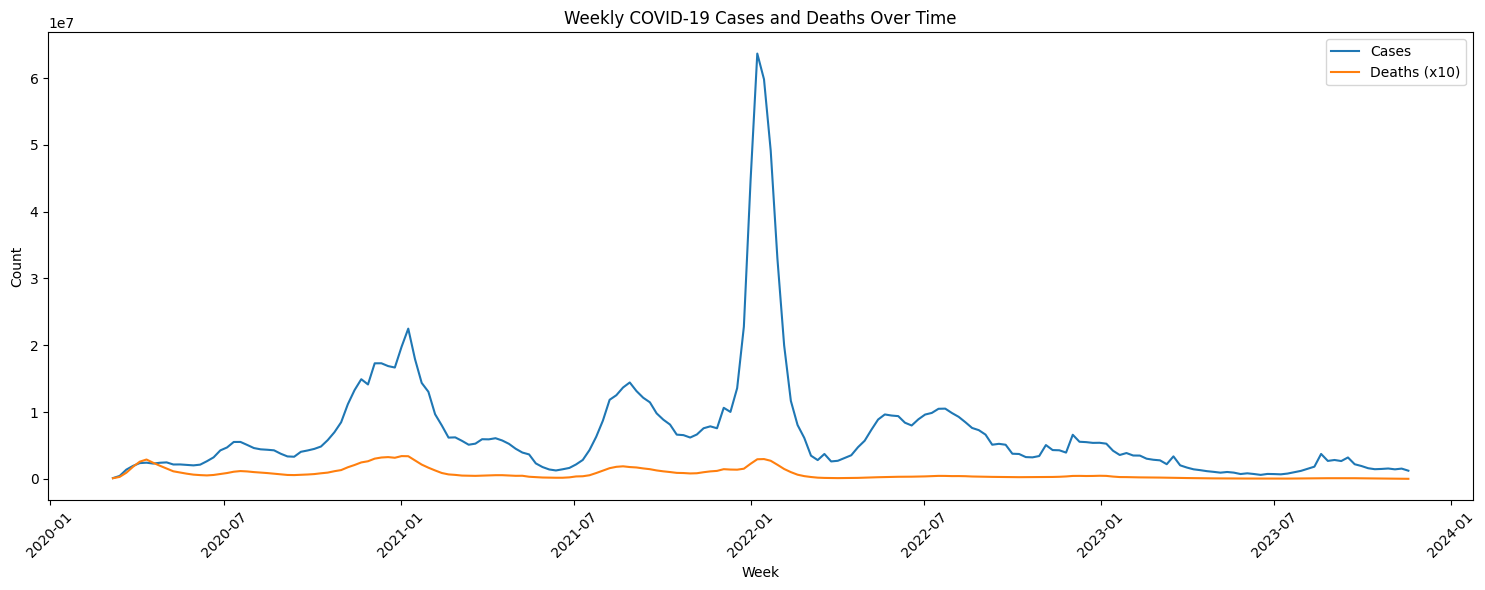

In [82]:
trend_results = analyze_temporal_trends(df_2)

print("\nPeak Statistics:")
print(f"Peak Cases Week: {trend_results['peak_cases']['week']}")
print(f"Peak Cases Count: {trend_results['peak_cases']['count']:,.0f}")
print(f"Peak Deaths Week: {trend_results['peak_deaths']['week']}")
print(f"Peak Deaths Count: {trend_results['peak_deaths']['count']:,.0f}")

print("\nGrowth Statistics:")
print(f"Average Weekly Case Growth: {trend_results['average_weekly_growth']['cases']*100:.1f}%")
print(f"Average Weekly Death Growth: {trend_results['average_weekly_growth']['deaths']*100:.1f}%")

# Visualize temporal trends
weekly_stats = trend_results['weekly_stats']
plt.figure(figsize=(15, 6))
plt.plot(weekly_stats['end_of_week'], weekly_stats['case_count_suppressed'], label='Cases')
plt.plot(weekly_stats['end_of_week'], weekly_stats['death_count_suppressed'] * 10, label='Deaths (x10)')
plt.title('Weekly COVID-19 Cases and Deaths Over Time')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion

The detailed study of COVID-19 statistics shows that there are large differences in the incidence and mortality of the disease for different categories of the population and regions. The disparities are especially observed in AI/AN, NH communities, with the highest case rates (179.28 per 100,000); however, mortality rates differed across countries, and some countries like Mexico had the highest rates of 4.51%. The temporal analysis reveals that even though the pandemic experienced multiple waves of infection with the highest number of cases recorded in January 2022, over 63 million, the nature of the relationship between cases and deaths changed over time implying that the treatment of the virus or the virus itself changed over time.

The testing and demographic analysis also shows some trends on testing and demographic effects, where the negative coefficient (-0.023) between testing rates and mortality shows that testing intensity did not define the results. The age-sex distribution reveals more cases in persons aged 18-29 years while the mortality distribution was inclined towards the older persons. Such differences place stress on the myriad factors responsible for COVID-19 outcomes, including health care system capacity, demography, and policy measures. True, there are significant differences in the outcomes by populations and regions, bringing a concern in the significance of applying specific public health interventions and a call for equal access to healthcare between future outbreaks.